In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"D:\Deep Learning 100 days\Day_15_weight_initilization_technuqie(not_to_do(\ushape.csv",header=None)

In [5]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [8]:
df.columns = ['X', 'Y', 'class']

In [10]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


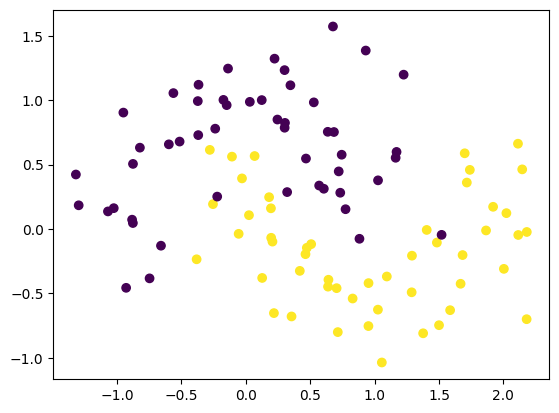

In [11]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
#same model as drawn in notebook
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Set parameters to 0
model.get_weights()

[array([[-0.07288313, -0.48410332],
        [-0.40429598,  1.1567341 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.1244577 ],
        [-0.26879704]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
initial_weights = model.get_weights()

In [17]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [18]:
model.set_weights(initial_weights)

In [19]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_lo

In [22]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00834256], dtype=float32)]

In [ ]:
#you can see still weights are 0 only how we initilize
#if you want to see for the tanh----change relu to tanh you will see the same result only

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

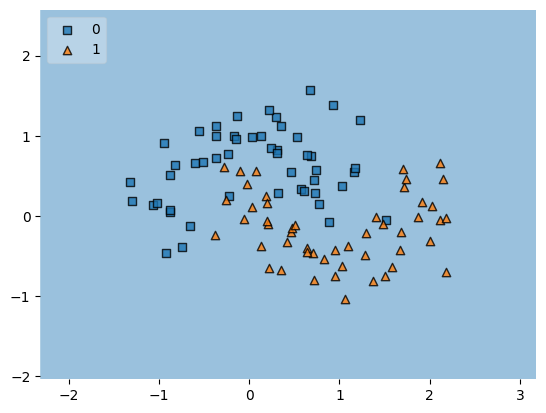

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)